Масив NumPy зі значеннями стовпця 'field artillery':
[  49   49   50   74   77   85   90  105  105  109  117  120  120  123
  125  135  140  150  150  190  201  205  213  230  240  252  267  280
  291  293  294  302  303  305  311  316  317  325  330  332  332  332
  333  335  342  347  349  358  366  366  371  376  381  386  391  393
  397  403  408  411  416  421  431  435  436  451  459  475  491  499
  502  509  509  513  519  528  534  542  551  555  577  578  586  595
  596  596  599  604  606  606  617  623  628  631  643  649  659  661
  675  680  686  690  694  703  711  712  712  715  718  721  722  729
  734  739  745  749  752  752  756  759  764  764  771  778  781  790
  796  800  801  804  806  806  815  828  832  834  838  838  839  840
  842  846  846  849  851  856  859  863  864  869  876  880  883  894
  900  906  916  932  936  939  946  950  955  958  960  964  971  974
  975  978  980  985  989  993 1010 1016 1018 1028 1032 1033 1036 1037
 1040 1045 1050 1060 107

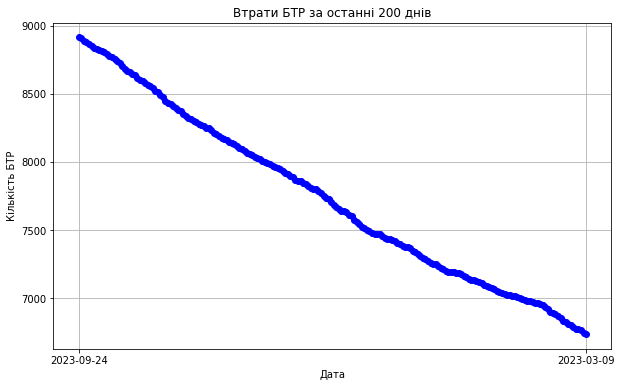

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Створіть функцію, яка приймає назву файлу та назву стовпця як параметр та повертає масив numpy зі значеннями стовпця.
def get_column_as_numpy_array(file_name, column_name):
    try:
        
        df = pd.read_csv(file_name)
        

        if column_name in df.columns:   
            column_values = df[column_name].values
            return column_values
        else:
            return None  
    except Exception as e:
        print(f"Помилка: {e}")
        return None  

file_name = r"D:\Навчання\ХПІ\Pyton\L1\russia_losses_equipment.csv"  
column_name1 = "field artillery"
column_name2 = "APC"

result1 = get_column_as_numpy_array(file_name, column_name1)
result2 = get_column_as_numpy_array(file_name, column_name2)

if result1 is not None:
    print(f"Масив NumPy зі значеннями стовпця '{column_name1}':")
    print(result1)
else:
    print(f"Стовпець '{column_name1}' не знайдено в файлі '{file_name}'.")

if result2 is not None:
    print(f"Масив NumPy зі значеннями стовпця '{column_name2}':")
    print(result2)
else:
    print(f"Стовпець '{column_name2}' не знайдено в файлі '{file_name}'.")

# Функція для знаходження 5 найбільших змін втрат БТР разом із датами
def top_5_changes_btr_losses(file_name):
    try:
        df = pd.read_csv(file_name)
        
        # Додаємо стовпець, який представляє різницю між втратами
        df["APC_changes"] = df["APC"].diff()

        # Вибираємо 5 найбільших змін в стовпці "APC_changes"
        top_5_changes = df.nlargest(5, "APC_changes")[["date", "APC_changes"]]
        
        return top_5_changes
    except Exception as e:
        print(f"Помилка: {e}")
        return None

# Функція для розрахунку середнього значення втрат БТР за період 100-500 днів війни
def average_losses_period(file_name, start_day, end_day):
    try:
        df = pd.read_csv(file_name)

        # Додаємо стовпець, який представляє різницю між втратами
        df["APC_changes"] = df["APC"].diff()

        # Вибираємо дані за вказаний період
        selected_period_losses = df[(df["day"] >= start_day) & (df["day"] <= end_day)]

        # Розраховуємо середнє значення втрат БТР
        average_losses = selected_period_losses["APC_changes"].mean()
        
        return average_losses
    except Exception as e:
        print(f"Помилка: {e}")
        return None

# Функція для розрахунку кількості БТР, знищених влітку 2023 року
def btr_destroyed_summer_2023(file_name):
    try:
        df = pd.read_csv(file_name)

        # Додаємо стовпець, який представляє різницю між втратами
        df["APC_changes"] = df["APC"].diff()

        # Вибираємо дані за літо 2023 року
        summer_2023_losses = df[(df["date"] >= "2023-06-01") & (df["date"] <= "2023-08-31")]

        # Розраховуємо кількість БТР, знищених влітку 2023 року
        btr_destroyed_count = summer_2023_losses["APC_changes"].sum()
        
        return btr_destroyed_count
    except Exception as e:
        print(f"Помилка: {e}")
        return None
# Функція для створення графіка втрат БТР за останні 200 днів
def plot_last_200_days(file_name):
    try:
        df = pd.read_csv(file_name)

        # Сортуємо дані за датою в зворотньому порядку
        df = df.sort_values(by='date', ascending=False)

        # Вибираємо останні 200 днів
        last_200_days = df.head(200)

        # Створюємо графік
        plt.figure(figsize=(10, 6))
        plt.plot(last_200_days['date'], last_200_days['APC'], marker='o', linestyle='-', color='b')
        plt.title('Втрати БТР за останні 200 днів')
        plt.xlabel('Дата')
        plt.ylabel('Кількість БТР')
        plt.xticks([last_200_days['date'].iloc[0], last_200_days['date'].iloc[-1]])
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"Помилка: {e}")

# Викликаємо функції та виводимо результат
top_changes_df = top_5_changes_btr_losses(file_name)
average_losses_period_value = average_losses_period(file_name, 100, 500)
btr_destroyed_summer_2023_value = btr_destroyed_summer_2023(file_name)

if top_changes_df is not None:
    print("5 найбільших змін втрат БТР разом із датами:")
    print(top_changes_df)
else:
    print("Помилка при отриманні 5 найбільших змін втрат БТР.")

if average_losses_period_value is not None:
    print(f"Середнє значення втрат БТР за період 100-500 днів війни: {average_losses_period_value}")
else:
    print("Помилка при отриманні середнього значення втрат БТР за період 100-500 днів війни.")

if btr_destroyed_summer_2023_value is not None:
    print(f"Кількість БТР, знищених влітку 2023 року: {btr_destroyed_summer_2023_value}")
else:
    print("Помилка при отриманні кількості БТР, знищених влітку 2023 року.")
plot_last_200_days(file_name)